# Lab 3 
- Authors : Hugo G, Dylan N, Aiden T

In [38]:
from tqdm import tqdm 
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import scipy.stats as stats
import math
from scipy.stats import linregress
import random
import time

# 1. Code and Explanation

### 1.1 Code

In [34]:
def is_convex(polygon):
    """
    Determines if a polygon is convex.

    Parameters:
    polygon (list of tuples): List of (x, y) tuples representing the vertices of the polygon in order.

    Returns:
    bool: True if the polygon is convex, False if concave.
    """
    if len(polygon) < 3:
        raise ValueError("A polygon must have at least three vertices.")

    def cross_product(o, a, b):
        """
        Computes the cross product of OA and OB vectors.

        Parameters:
        o, a, b (tuple): Points represented as (x, y).

        Returns:
        float: The z-component of the cross product.
        """
        return (a[0] - o[0]) * (b[1] - o[1]) - \
               (a[1] - o[1]) * (b[0] - o[0])

    num_points = len(polygon)
    prev_cross = 0
    for i in range(num_points):
        o = polygon[i]
        a = polygon[(i + 1) % num_points] # Next point
        b = polygon[(i + 2) % num_points] # Next next point
        cross = cross_product(o, a, b)
        if cross != 0: # Skip collinear points
            if prev_cross != 0:
                if (cross > 0) != (prev_cross > 0):
                    return False
            prev_cross = cross
    return True


### 1.2 Explanation 
This code works by finding the cross_product of the two edges for each vercice in the shape. 
The cross product can identify if the an edge is turning left or right. If the shape is convex, all the edges will turn the same way. 
If the shape is concave, at least one of the edges with turn the opposite way.
The code will identify if any angle is odd and return false.

< add ilustrations to be added>

### 1.3 pseduocode
```
def is_convex(list<> points):
    prev_cross = 0
    for i in points:
        point_prev = points[i - 1]
        point_curr = points[i]
        point_next = points[i + 1]

        cross = cross_product[point_prev,point_curr,point_next]

        if cross == 0:
            return true
        
        if prev_cross = 0:
            prev_cross = current cross
        else:
            if (prev_cross > 0 and cross < 0) OR (prev_cross <0 and cross > 0):
                return true
    
    return false
```

### 1.4 Explanation why it is correct 
A shape is convex if it has no interior angles greater than 180 degrees.
We can also say that a shape is conex if it has no extirior angles smaller than 180 degrees.
It is not easy to determine if an angle is interior or exterior.
The cross product will always return a number bigger or smaller than 0 which will determine if an angle is biiger or smaller than 180 degrees.
The cross product is also consistent and will always either measure the interior or exterior angle.
because of this we can measure if all interior angles are smaller than 180 degrees or all exterior angles are bigger than 180 degrees.
And through this we can determine if a shape is convex or not.

# 2. Testing code

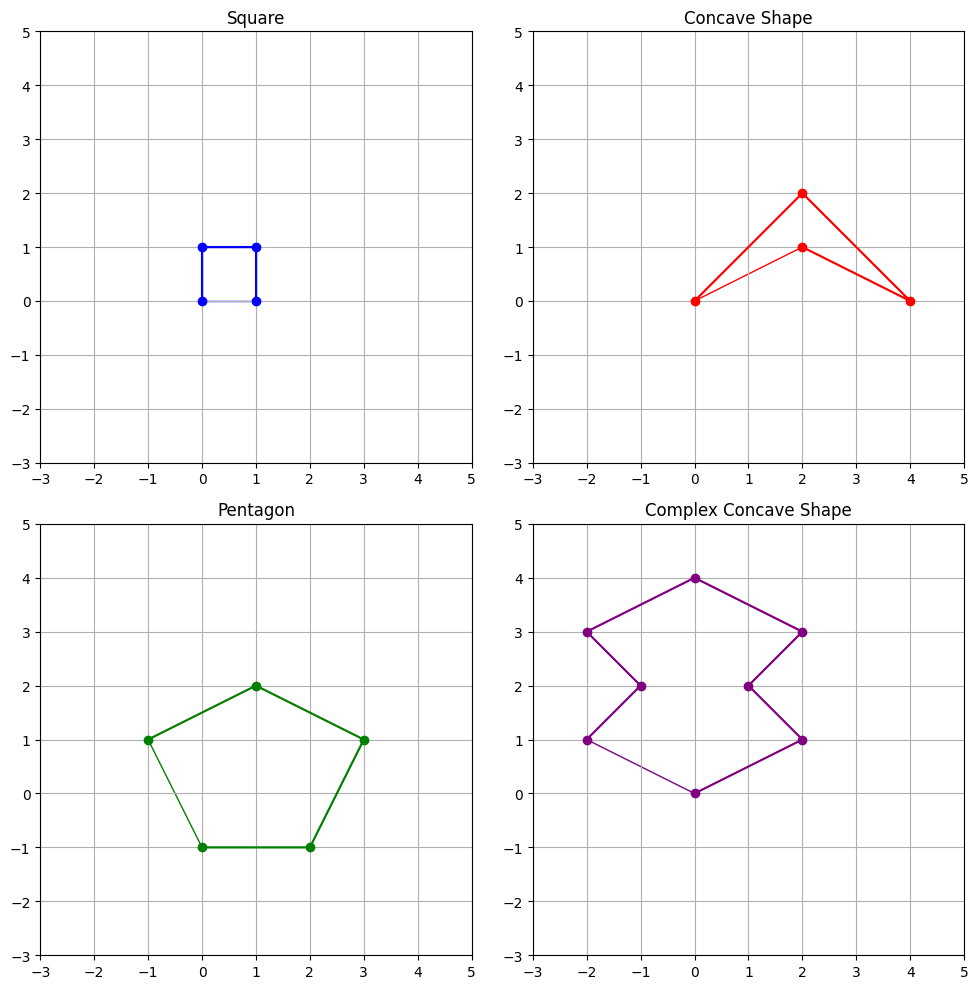

Square is convex: True
Concave shape is convex: False
Pentagon is convex: True
Complex concave shape is convex: False


In [15]:
def plot_polygon(ax, vertices, color='blue'):
    polygon = patches.Polygon(vertices, closed=True, fill=None, edgecolor=color)
    ax.add_patch(polygon)
    ax.plot(*zip(*vertices), marker='o', color=color)

if __name__ == "__main__":
    # Convex Polygon (e.g., square)
    square = [(0, 0), (0, 1), (1, 1), (1, 0)]
    # Concave Polygon (e.g., arrow shape)
    concave = [(0, 0), (2, 2), (4, 0), (2, 1)]
    # Another Convex Polygon (e.g., regular pentagon)
    pentagon = [(-1, 1), (1, 2), (3, 1), (2, -1), (0, -1)]
    # Complex Concave Polygon
    complex_concave = [(0,0), (2,1), (1,2), (2,3), (0,4), (-2,3), (-1,2), (-2,1)]

    fig, axs = plt.subplots(2, 2, figsize=(10, 10))

    plot_polygon(axs[0, 0], square, 'blue')
    axs[0, 0].set_title('Square')

    plot_polygon(axs[0, 1], concave, 'red')
    axs[0, 1].set_title('Concave Shape')

    plot_polygon(axs[1, 0], pentagon, 'green')
    axs[1, 0].set_title('Pentagon')

    plot_polygon(axs[1, 1], complex_concave, 'purple')
    axs[1, 1].set_title('Complex Concave Shape')

    for ax in axs.flat:
        ax.set_xlim(-3, 5)
        ax.set_ylim(-3, 5)
        ax.set_aspect('equal')
        ax.grid(True)

    plt.tight_layout()
    plt.show()

    print("Square is convex:", is_convex(square))  # Output: True
    print("Concave shape is convex:", is_convex(concave))  # Output: False
    print("Pentagon is convex:", is_convex(pentagon))  # Output: True
    print("Complex concave shape is convex:", is_convex(complex_concave))  # Output: False

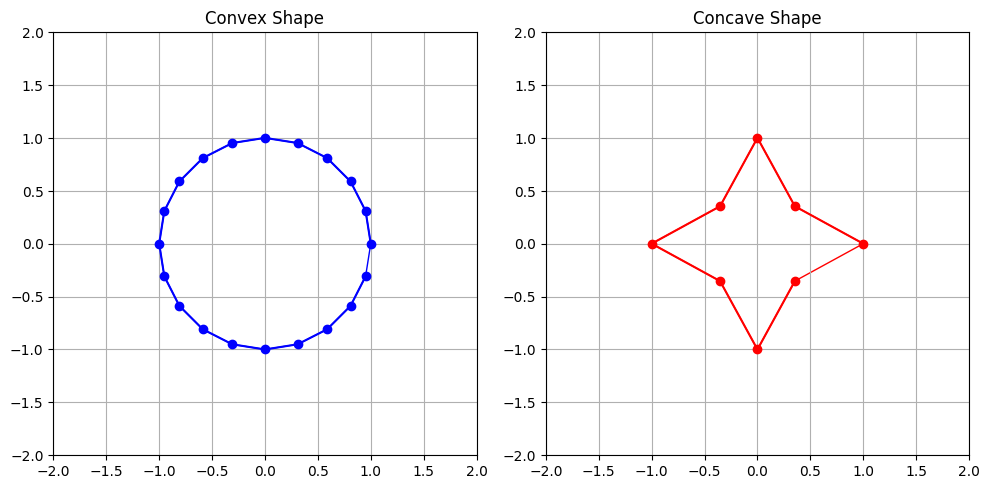

In [26]:
def generate_convex_polygon(num_vertices, radius=1):
    angles = np.linspace(0, 2 * np.pi, num_vertices, endpoint=False)
    vertices = [(np.cos(angle) * radius, np.sin(angle) * radius) for angle in angles]
    return vertices


def generate_concave_polygon(num_vertices, radius=1):
    angles = np.linspace(0, 2 * np.pi, num_vertices, endpoint=False)
    vertices = []
    for i, angle in enumerate(angles):
        r = radius if i % 2 == 0 else radius / 2
        vertices.append((np.cos(angle) * r, np.sin(angle) * r))
    return vertices

if __name__ == "__main__":
    # Generate shapes
    convex_shape = generate_convex_polygon(20)
    concave_shape = generate_concave_polygon(8)

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    plot_polygon(axs[0], convex_shape, 'blue')
    axs[0].set_title('Convex Shape')

    plot_polygon(axs[1], concave_shape, 'red')
    axs[1].set_title('Concave Shape')

    for ax in axs.flat:
        ax.set_xlim(-2, 2)
        ax.set_ylim(-2, 2)
        ax.set_aspect('equal')
        ax.grid(True)

    plt.tight_layout()
    plt.show()

In [30]:
for i in tqdm(range(7, 10000, 10)):
    convex_shape = generate_convex_polygon(i)
    assert is_convex(convex_shape)

    concave_shape = generate_concave_polygon(i)
    assert not is_convex(concave_shape)
print("All tests passed!")

100%|██████████| 1000/1000 [01:03<00:00, 15.72it/s]

All tests passed!


# 3. Benchmarking and time analysis

In [37]:
def beanchmark(times, lengths, title):
    log_sizes = np.log(lengths)
    log_times = np.log(times)
    m, b, _, _, _ = linregress(log_sizes, log_times)
    regression_line = np.exp(m * np.log(lengths) + b)

    plt.figure(figsize=(10, 6))
    plt.scatter(lengths, times, label='Data Points', color='blue', s=10)
    plt.plot(lengths, regression_line, label='Regression Line', color='red')
    plt.xlabel('Array Length')
    plt.ylabel('Time (seconds)')
    plt.title(f'{title} Time Complexity')
    equation_text = f"Time = {np.exp(b):.2e} * length^{m:.2f}"
    plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
    plt.legend()
    plt.show()
    print(f"{title} equation_text: {equation_text}")

In [39]:
concave_times = []
for i in tqdm(range(7, 10000, 10)):
    start = time.time()
    concave_shape = generate_concave_polygon(i)
    concave_times.append(time.time() - start)

convex_times = []
for i in tqdm(range(7, 10000, 10)):
    start = time.time()
    convex_shape = generate_convex_polygon(i)
    convex_times.append(time.time() - start)

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x000001CF63C8F790>>
Traceback (most recent call last):
  File "C:\Users\garrido-lestacheh\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 790, in _clean_thread_parent_frames
    active_threads = {thread.ident for thread in threading.enumerate()}
  File "c:\Users\garrido-lestacheh\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1467, in enumerate
    return list(_active.values()) + list(_limbo.values())
KeyboardInterrupt: 


KeyboardInterrupt: 

: 

: 

In [ ]:
beanchmark(convex_times, range(7, 10000, 10), 'Convex Polygon Generation')
beanchmark(concave_times, range(7, 10000, 10), 'Concave Polygon Generation')    